In [1]:
import cv2
import os
import numpy as np
import skimage
from skimage import io, transform, color, filters, data, morphology, measure
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

def load_images_from_folder(folder):
    images = []
    images_name = []
    for filename in os.listdir(folder):
        img = io.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
            images_name.append(filename[0:4])
    
    images_df = pd.DataFrame({"name": images_name,
                             "image": images})
    #print(images_df)
    return images_df

def display(np_image):
    """
    This is a display function that we have added to show numpy images at full size
    If you pass in an image with 3 channels, it will be displayed in RGB
    If you passn in an image with 1 channel, it will be displayed in grayscale
    """
    dpi = matplotlib.rcParams['figure.dpi']
    if len(np_image.shape) == 3:
        height, width, depth = np_image.shape
    else:
        height, width = np_image.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')
    
    # Display the image in either RGB or grayscale (depending on the amount of dimensions)
    if (len(np_image.shape) >= 3):
        ax.imshow(np_image)
    else:
        ax.imshow(np_image, cmap='gray')

    plt.show()

all_images_df = load_images_from_folder('../dataset-images/dataset1')
all_images_df
#print(len(list_images))
#print(list_images[0])
#print(list_images_name)
#print('----------done---------')

,name,image
0,1000,"[[[241, 241, 241], [242, 242, 242], [244, 244,..."
1,1027,"[[[206, 206, 206], [211, 211, 211], [218, 218,..."
2,1029,"[[[82, 82, 82], [83, 83, 83], [84, 84, 84], [8..."
3,1036,"[[[241, 241, 241], [246, 246, 246], [243, 243,..."
4,1053,"[[[241, 241, 241], [243, 243, 243], [243, 243,..."
...,...,...
235,5264,"[[[228, 228, 228], [227, 227, 227], [224, 224,..."
236,5339,"[[[70, 70, 70], [71, 71, 71], [67, 67, 67], [7..."
237,5377,"[[[243, 243, 243], [236, 236, 236], [243, 243,..."
238,5382,"[[[214, 214, 214], [222, 222, 222], [206, 206,..."


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


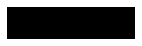

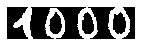

lol:  1
lol:  0
lol:  0
lol:  0


,number,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,0.0,0.0,45.0,7.0,0.0,29.0,62.0,0.0,7.0,30.0,56.0,0.0,0.0,0.0,42.0,5.0
1,0,0.0,39.0,27.0,0.0,3.0,33.0,20.0,9.0,13.0,23.0,12.0,16.0,3.0,41.0,41.0,4.0
2,0,1.0,40.0,32.0,0.0,8.0,33.0,21.0,8.0,9.0,25.0,9.0,17.0,0.0,43.0,41.0,8.0
3,0,5.0,52.0,41.0,0.0,16.0,20.0,18.0,18.0,20.0,18.0,11.0,23.0,2.0,44.0,43.0,7.0


In [2]:
import matplotlib
import matplotlib.pyplot as plt


image = all_images_df.iloc[0,1]
image_name = all_images_df.iloc[0,0]

image = image*-1
display(image)
gray = color.rgb2gray(image)
thresh = filters.threshold_otsu(gray)
binary = gray > thresh
display(binary)

binary_splitted = [binary[:, :32], binary[:, 32:64], binary[:, 64:96], binary[:, 96:128]]
df = pd.DataFrame()
for x in range(0, len(binary_splitted)):
    
    
    test = binary_splitted[x]
    height = 8
    width = 8

    s_width = 0
    s_heigth = 0
    print('lol: ', image_name[x])
    #df_tmp = pd.DataFrame({"number": [image_name[x]]})
    df.loc[x, 'number'] = image_name[x]
    for i in range(1, 17):
        h = s_heigth+height
        w = s_width+width
        feat = test[s_heigth:h, s_width:w]
        white_pixels = feat[feat==1]
        total_white_pixels = len(white_pixels)
        df.loc[x, i] = total_white_pixels
        if (i%4 == 0):
            s_width = 0
            s_heigth = s_heigth + height
        else:
            s_width = s_width + width
        #plt.subplot(4,4,i)
        #plt.imshow(feat)
        #display(feat)
    #pd.concat([df, df_tmp])
    #print(binary1)


df

In [3]:
df = None
error_counts = 0

def initialize_image(image, image_name):
    zipcode = image
    zipcode = zipcode *-1
    gray = color.rgb2gray(zipcode)
    thresh = filters.threshold_otsu(gray)
    binary = gray > thresh
    binary_splitted = [binary[:, :32], binary[:, 32:64], binary[:, 64:96], binary[:, 96:128]]
    
    df = pd.DataFrame()
    for x in range(0, len(binary_splitted)):
        
        test = binary_splitted[x]
        height = 8
        width = 8

        s_width = 0
        s_heigth = 0
        #print('lol: ', image_name[x])
        df.loc[x, 'number'] = image_name[x]

        for i in range(1, 17):
            h = s_heigth+height
            w = s_width+width
            feat = test[s_heigth:h, s_width:w]
            white_pixels = feat[feat==1]
            total_white_pixels = len(white_pixels)
            df.loc[x, i] = total_white_pixels
            if (i%4 == 0):
                s_width = 0
                s_heigth = s_heigth + height
            else:
                s_width = s_width + width
            #plt.subplot(4,4,i)
            #plt.imshow(feat)
            #display(feat)

        #pd.concat([df, df_tmp])
        
    return df
    #display(binary)
    


In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scalerA = StandardScaler()
scalerB = MinMaxScaler()
result = pd.DataFrame()
for i in range(0, len(all_images_df.index)):
    image_name = all_images_df.iloc[i,0]
    image = all_images_df.iloc[i,1]
    tmp_result = initialize_image(image, image_name)
    result = pd.concat([result, tmp_result])
    

result.reset_index(inplace=True)
result.drop(columns=['index'], inplace=True)
result

,number,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,0.0,0.0,45.0,7.0,0.0,29.0,62.0,0.0,7.0,30.0,56.0,0.0,0.0,0.0,42.0,5.0
1,0,0.0,39.0,27.0,0.0,3.0,33.0,20.0,9.0,13.0,23.0,12.0,16.0,3.0,41.0,41.0,4.0
2,0,1.0,40.0,32.0,0.0,8.0,33.0,21.0,8.0,9.0,25.0,9.0,17.0,0.0,43.0,41.0,8.0
3,0,5.0,52.0,41.0,0.0,16.0,20.0,18.0,18.0,20.0,18.0,11.0,23.0,2.0,44.0,43.0,7.0
4,1,0.0,48.0,0.0,0.0,19.0,58.0,3.0,0.0,0.0,28.0,13.0,0.0,0.0,52.0,59.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,2,11.0,57.0,30.0,3.0,7.0,12.0,42.0,2.0,1.0,29.0,21.0,3.0,8.0,63.0,50.0,20.0
956,5,10.0,59.0,50.0,9.0,9.0,44.0,13.0,12.0,9.0,14.0,37.0,6.0,9.0,49.0,40.0,8.0
957,3,17.0,47.0,41.0,13.0,10.0,28.0,40.0,9.0,9.0,15.0,47.0,24.0,12.0,39.0,44.0,12.0
958,8,13.0,42.0,31.0,11.0,18.0,46.0,49.0,17.0,17.0,54.0,45.0,21.0,7.0,49.0,46.0,16.0


In [5]:
features = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

def preprocess(X_train, X_test):
    print('-----Start preprocc----------')
    global features
    X_train[features] = scalerB.fit_transform(X_train[features].to_numpy())
    X_test[features] = scalerB.transform(X_test[features].to_numpy())
    print('---------Preprocess Done--------')
    return X_train, X_test

def splitTrainTest(result):
    # Split data into 50% train and 50% test subsets
    global features
    X_train, X_test, y_train, y_test = train_test_split(
        result[features], result['number'], test_size=0.3, random_state=0)
    
    X_train, X_test = preprocess(X_train, X_test)
    return X_train, X_test, y_train, y_test

#print('-------splitting train en test data------')
#train_data = result.sample(frac=0.9, random_state=25)
#print('-------50%------')
#test_data = result.drop(train_data.index)

In [6]:
#y_test = test_data.loc[:,['number']]
#x_test = test_data.loc[:,features]


#y_train = train_data.loc[:,['number']]
#x_train = train_data.iloc[:,features]
#x_train.reset_index(inplace=True)
#x_test.reset_index(inplace=True)
#x_test.drop(columns=['index'], inplace=True)
#x_train.drop(columns=['index'], inplace=True)

#y_train.reset_index(inplace=True)
#y_test.reset_index(inplace=True)
#y_test.drop(columns=['index'], inplace=True)
#y_train.drop(columns=['index'], inplace=True)


#x_test

In [7]:
from sklearn.neighbors import KNeighborsClassifier

def fit_score(X_train, X_test, y_train, y_test):
    train_samples = len(X_train)
    test_samples = len (X_test)
    neigh = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='manhattan')
    neigh.fit(X_train, y_train.to_numpy().reshape(train_samples))

    score = neigh.score(X_test, y_test.to_numpy().reshape(test_samples))
    return score

    # Explanation KneighborsClassifier


In [8]:
from sklearn.model_selection import KFold

#we want to test the  model for overfitting and underfitting. for this i will use Kfold.
def kfolding(dataset):
    kf = KFold(n_splits=5, shuffle=True)
    features = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
    X_training = dataset[features]
    y_training = dataset['number']
    k = 1
    for train_index, test_index in kf.split(X_training, y_training):
        
        X_train, X_test = X_training.loc[train_index,:], X_training.loc[test_index,:]
        y_train, y_test = y_training.loc[train_index], y_training.loc[test_index]
        X_train, X_test = preprocess(X_train, X_test)
        
        score = fit_score(X_train, X_test, y_train, y_test)
        print("[fold {0}], score: {1:.5f}".
          format(k, score))
        k = k + 1
        
        

In [9]:
#kfolding(result)

In [10]:
from sklearn.model_selection import GridSearchCV

def searchHyperParams(result):
    print('--------start searching params--------')
    X_train, X_test, y_train, y_test = splitTrainTest(result)
    print('--------splitted train test----------')
    grid_params = {
        'n_neighbors' : [3,5,11,14,19],
        'weights' : ['uniform', 'distance'],
        'metric' : ['euclidean', 'manhattan', 'chebyshev']
    }

    gs = GridSearchCV(
        KNeighborsClassifier(),
        grid_params,
        verbose = 1,
        cv = 3,
        n_jobs = -1
    )
    print('---------grid search started---------')
    gs_results = gs.fit(X_train, y_train)

    print('--------Done--------')
    print('best score:')
    print(gs_results.best_score_)
    print('best estimator:')
    print(gs_results.best_estimator_)
    print('best params:')
    print(gs_results.best_params_)


In [11]:
#searchHyperParams(result)

In [12]:
#according to the gridsearchcv, the best working hyper parameters are
# manhatten metric
# 5 neighbors
# distance weights
# score 0.912202...
# now we know the best settings for our KNN classifier. we can put the transformer and ML algorithm in a pipeline.

from sklearn.pipeline import Pipeline
def usingPipelines(result):
    knnClassifier = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='manhattan')
    knnPipe = Pipeline([('scaler', MinMaxScaler()), ('clf', knnClassifier)])
    X_train, X_test, y_train, y_test = splitTrainTest(result)
    print('-------train model----------')
    knnPipe.fit(X_train, y_train)
    print('----------score---------')
    score = knnPipe.score(X_test, y_test)

    print('----------done---------')
    print('the score is: {0}'.format(score))

In [13]:
# still a nice score. Lets validate the model with k-fold for overfitting/underfitting

#kfolding(result)

In [14]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = splitTrainTest(result)
gnb = GaussianNB()
gnb.fit(X_train, y_train)

score = gnb.score(X_test, y_test)
print(score)

0.8472222222222222


In [15]:
from sklearn.svm import SVC

def searchHyperParams_svc(result):
    print('--------start searching params--------')
    X_train, X_test, y_train, y_test = splitTrainTest(result)
    print('--------splitted train test----------')
    grid_params = {
        'C': [0.1,1, 10, 100],
        'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': [1,0.1,0.01,0.001]
    }

    gs = GridSearchCV(
        SVC(),
        grid_params,
        verbose = 1,
        cv = 3,
        n_jobs = -1
    )
    print('---------grid search started---------')
    gs_results = gs.fit(X_train, y_train)

    print('--------Done--------')
    print('best score:')
    print(gs_results.best_score_)
    print('best estimator:')
    print(gs_results.best_estimator_)
    print('best params:')
    print(gs_results.best_params_)

In [16]:
searchHyperParams_svc(result)

--------start searching params--------
--------splitted train test----------
---------grid search started---------
Fitting 3 folds for each of 64 candidates, totalling 192 fits
--------Done--------
best score:
0.9211309523809524
best estimator:
SVC(C=1, gamma=0.001)
best params:
{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [17]:
# best params for svc
# {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [18]:
from sklearn.tree import DecisionTreeClassifier

def searchHyperParams_DT(result):
    print('--------start searching params--------')
    X_train, X_test, y_train, y_test = splitTrainTest(result)
    print('--------splitted train test----------')
    grid_params = {
        'criterion': ['gini', 'entropy'],
        'splitter' : ['best', 'random'],
        'max_depth': [1,5,10,20,50,100,150,None],
        'min_samples_split': np.arange(2,5),
        'min_samples_leaf': np.arange(1,5),
        'min_weight_fraction_leaf': np.arange(0,0.5)
    }

    gs = GridSearchCV(
        DecisionTreeClassifier(),
        grid_params,
        verbose = 1,
        cv = 3,
        n_jobs = -1
    )
    print('---------grid search started---------')
    gs_results = gs.fit(X_train, y_train)

    print('--------Done--------')
    print('best score:')
    print(gs_results.best_score_)
    print('best estimator:')
    print(gs_results.best_estimator_)
    print('best params:')
    print(gs_results.best_params_)

In [19]:
searchHyperParams_DT(result)

--------start searching params--------
--------splitted train test----------
---------grid search started---------
Fitting 3 folds for each of 384 candidates, totalling 1152 fits
--------Done--------
best score:
0.7261904761904762
best estimator:
DecisionTreeClassifier(criterion='entropy', max_depth=100, min_samples_leaf=3)
best params:
{'criterion': 'entropy', 'max_depth': 100, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}


In [20]:
from sklearn.ensemble import RandomForestClassifier

def searchHyperParams_RC(result):
    print('--------start searching params--------')
    X_train, X_test, y_train, y_test = splitTrainTest(result)
    print('--------splitted train test----------')
    grid_params = {
        'bootstrap': [True, False],
         'max_depth': [10, 20, 30, 40, None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_leaf': [1, 2, 4],
         'min_samples_split': [2, 5, 10],
         'n_estimators': [200, 400, 600, 800]
    }

    gs = GridSearchCV(
        RandomForestClassifier(),
        grid_params,
        verbose = 3,
        cv = 3,
        n_jobs = -1
    )
    print('---------grid search started---------')
    gs_results = gs.fit(X_train, y_train)

    print('--------Done--------')
    print('best score:')
    print(gs_results.best_score_)
    print('best estimator:')
    print(gs_results.best_estimator_)
    print('best params:')
    print(gs_results.best_params_)

In [21]:
searchHyperParams_RC(result)

--------start searching params--------
--------splitted train test----------
---------grid search started---------
Fitting 3 folds for each of 720 candidates, totalling 2160 fits
--------Done--------
best score:
0.9002976190476191
best estimator:
RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=800)
best params:
{'bootstrap': False, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 800}


In [ ]:
# 0.900
# best params:
#{'bootstrap': False, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 800}
